# Assignment 1
## Description
The census-income dataset contains census information for 48,842 people. It has 14 attributes for each person (age, workclass, fnlwgt, education, education-num, marital-status, occupation, relationship, race, sex, capital-gain, capital-loss, hours-per-week, and native-country) and a Boolean attribute class classifying the input of the person as belonging to one of two categories >50K, <=50K. The prediction problem here is to classify whether a person’s salary is >50K or <= 50K given the attribute values.
## Properties of Data
- Number of Instances
    - 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
    - 45222 if instances with unknown values are removed (train=30162, test=15060)
- Number of Attributes: 6 continuous, 8 nominal attributes
- Attribute Information:
    1) age: continuous
    2) workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
    3) fnlwgt: continuous
    4) education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool
    5) education-num: continuous
    6) marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse
    7) occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces
    8) relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
    9) race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
    10) sex: Female, Male
    11) capital-gain: continuous
    12) capital-loss: continuous
    13) hours-per-week: continuous
    14) native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands
    15) class: >50K, <=50K

To get started with the model, run environment.yml file to initialize the conda environment with relevant libraries

## Processing Training Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import chefboost.Chefboost as chef
# import chefboost as chf
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import plot_tree
import json
import pickle
import graphviz
%matplotlib inline

In [3]:
train_df = pd.read_csv("data1/train.csv", na_values="?")
test_df = pd.read_csv("data1/test.csv", na_values="?")
train_df[25:30]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
26,19,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
27,54,NaN,180211,Some-college,10,Married-civ-spouse,NaN,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
29,49,Private,193366,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [4]:
train_df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [4]:
mode_values = train_df.median(numeric_only=True)
train_df.fillna(mode_values, inplace=True)
mode_values

age                   37.0
fnlwgt            178356.0
education-num         10.0
capital-gain           0.0
capital-loss           0.0
hours-per-week        40.0
dtype: float64

In [5]:
mode_values = []
for column in train_df.columns:
    if train_df[column].dtype == 'object':
        mode_value = train_df[column].mode()[0]
        mode_values.append(mode_value)
        train_df[column].fillna(mode_value, inplace=True)
mode_values

['Private',
 'HS-grad',
 'Married-civ-spouse',
 'Prof-specialty',
 'Husband',
 'White',
 'Male',
 'United-States',
 '<=50K']

In [8]:
train_df.rename(columns={'class':'Decision'}, inplace=True)
test_df.rename(columns={'class':'Decision'}, inplace=True)
train_df[25:30]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Decision
25,56,Local-gov,216851,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
26,19,Private,168294,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
27,54,Private,180211,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
28,39,Private,367260,HS-grad,9,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,80,United-States,<=50K
29,49,Private,193366,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


We have finally converted our training data to be used for training, by replacing NaN values with most repeated values for the respective columns, medians for numerical data, and converted the final class into a column called "Decision". 

One quirk in chefboost is the approach to the *target variable*— it must be stored in the same dataframe as the features, it must be called Decision and must be the very last column of the dataframe. Quite weird, but there is probably some good reason for that.

## Handling continuous values
For this algorithm, we're using Chefboost, an algorithm which allows us to implement C4.5 algorithm for Decision Tree, and allows us to calculate gain ratio as well. We will use this data to find points of discretization and make continuous values into discrete data, which can be fed to our machine.

In [31]:
#!pip install chefboost
from chefboost.training import Training
config = {'algorithm':'C4.5'}

In [38]:
def gainratiocal(threshold:float, column:object) -> float:
    idx = train_df[train_df[f"{column}"] <= threshold].index
    tmp_df = train_df.copy()
    tmp_df["{column}"] = f">{threshold}"
    tmp_df.loc[idx, f"{column}"] = f"<={threshold}"
    grat = Training.findGains(tmp_df, config)['gains'][f"{column}"]
    return grat

In [39]:
for i in range(1,100,10):
    a = gainratiocal(float(i),'hours-per-week')
    print(i,":",a)

1 : 0.01753148492873723
11 : 0.017751847016788638
21 : 0.018828987795244542
31 : 0.02064893040902423
41 : 0.023904627769250456
51 : 0.017662187191664586
61 : 0.008553549138154704
71 : 0.007151079969351616
81 : 0.00477984617092674
91 : 0.0023187326063295326


The above data clearly calculates the gain ratios for different values, from which we can clearly see that data around 31 and 41 may give desired decision boundary

### Other calculations
Here, we've done similar claculation for other remaining continuous attributes

In [43]:
for i in range (35, 51,2):
    a = gainratiocal(float(i),'hours-per-week')
    print(i,":",a)

35 : 0.021594639037470862
37 : 0.02197617790402921
39 : 0.022415767382654897
41 : 0.023904627769250456
43 : 0.02476910237843594
45 : 0.024482106814724198
47 : 0.024970789695430925
49 : 0.026858965904353535


We can observe that 49 would be the value with the highest gain ratio, giving us the decision boundary for this continuous column, we can do similar calculation for the rest, which is done so by chefboost model internally.

In [47]:
edunum = sorted(train_df['education-num'].unique())

In [49]:
for i in edunum:
    a = gainratiocal(float(i), 'education-num')
    print(i,":",a)

1 : 0.03192754615584799
2 : 0.03196053650702954
3 : 0.0321292294421387
4 : 0.032515666540499984
5 : 0.03304882274478729
6 : 0.03394432885606893
7 : 0.03527948364873703
8 : 0.03610098814658912
9 : 0.03933489231796834
10 : 0.05295739290033519
11 : 0.0604007911744962
12 : 0.06955873321174283
13 : 0.08772951926659586
14 : 0.1099725423325889
15 : 0.10501869293424891
16 : 0.0


For education-num, the value 14 establishes a good decision boundary

In [56]:
age = sorted(train_df['age'].unique())
for i in range(25,30):
    a = gainratiocal(float(i), 'age')
    print(i,":",a)

25 : 0.018878608763892753
26 : 0.018949020158395617
27 : 0.019008258539748947
28 : 0.018828616217681778
29 : 0.018589001236071493


For age, 27 is the decision boundary

In [77]:
fnlwg = sorted(train_df["fnlwgt"].unique())
for i in range(12200, 22200, 1000):
    a = gainratiocal(float(i), 'fnlwgt')
    print(i,":",a)

12200 : 0.04011843427056207
13200 : 0.04011843427056207
14200 : 0.04011860831741389
15200 : 0.04011287222370235
16200 : 0.04011287222370235
17200 : 0.04011287222370235
18200 : 0.04011287222370235
19200 : 0.04011209119723716
20200 : 0.04009173689623385
21200 : 0.04006503030840085


For fnlwgt, the boundary can be taken around 14200, although we may take more than one boundary for this case

## Training the Chefboost Model
For the C4.5 decision tree, we will use Chefboost library, which provides the model we require.
We choose this light-weight library because:
- support of categorical features, meaning we do not need to pre-process them using, for example, one-hot encoding.
- the decision trees trained using chefboost are stored as if-else statements in a dedicated Python file. This way, we can easily see what decisions the tree makes to arrive at a given prediction.
- we can choose one of the multiple algorithms to train the decision trees.

Chefboost implements different algorithms like ID3, C4.5, CART(this is implemented in scikit-learn). It also provides the models for random forest, which is why it is considered a better library for our particular assignment.

In [8]:
config = {'algorithm':'C4.5'}
model = chef.fit(train_df, config)

[INFO]:  4 CPU cores will be allocated in parallel running
C4.5  tree is going to be built...
-------------------------
finished in  2088.6931281089783  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  88.01019624704401 % on  32561  instances
Labels:  ['<=50K' '>50K']
Confusion matrix:  [[23115, 2299], [1605, 5542]]
Precision:  90.9538 %, Recall:  93.5073 %, F1:  92.2129 %


Decision rule:  outputs/rules/rules.py


<Axes: title={'center': 'Feature Importance'}, ylabel='feature'>

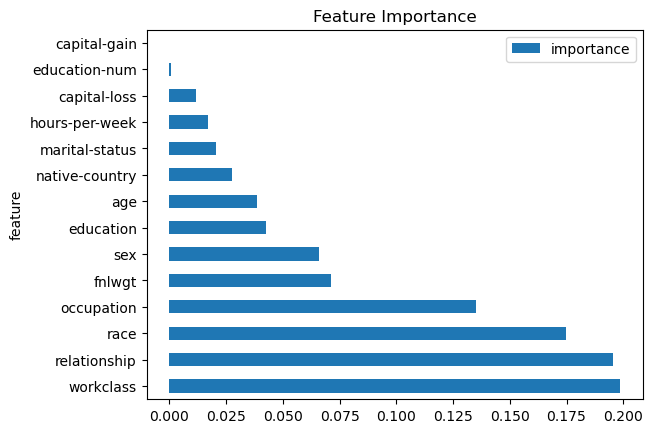

In [9]:
rules = "outputs/rules/rules.py"
fi = chef.feature_importance(rules).set_index("feature")
fi.plot(kind="barh", title="Feature Importance")

In [4]:
chfmdl = chef.load_model("model.pkl")

In [9]:
chef.evaluate(chfmdl, test_df)

-------------------------
Evaluate  test set
-------------------------
Accuracy:  82.07112585222038 % on  16281  instances
Labels:  ['<=50K' '>50K']
Confusion matrix:  [[11136, 1620], [1299, 2226]]
Precision:  87.3001 %, Recall:  89.5537 %, F1:  88.4125 %


Here, we have found the entire tree, and the tree's dependence on different attributres. We will now begin plotting error for training and testing data, and finally obtain a tree of better accuracy. Now, due to the shortcomings of the chefboost, we really can't apply pruning, and hence will use CART algorithm, due to the lack of availability of C4.5 algorithm.

## Training Scikit Learn model
To evaluate the final data and test different errors, we'll train the scikit decision tree model which works on CART algorithm, a much advanced algorithm

### Preprocessing data

In [58]:
train_df.columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_n', 'education_n', 'marital-status_n',
       'occupation_n', 'relationship_n', 'race_n', 'sex_n', 'native-country_n',
       'class_n'],
      dtype='object')

In [57]:
train_df.select_dtypes(include=['object']).iloc[0]

Series([], Name: 0, dtype: float64)

These are the columns which need to be encoded, for which we will use label encoder, which allows us to perform one hot encoding.

In [41]:
le_workc = LabelEncoder()
le_educ = LabelEncoder()
le_mari = LabelEncoder()
le_occup = LabelEncoder()
le_relat = LabelEncoder()
le_race = LabelEncoder()
le_sex = LabelEncoder()
le_native = LabelEncoder()
le_class = LabelEncoder()

In [42]:
train_df["workclass_n"] = le_workc.fit_transform(train_df["workclass"])
train_df["education_n"] = le_educ.fit_transform(train_df["education"])
train_df["marital-status_n"] = le_mari.fit_transform(train_df["marital-status"])
train_df["occupation_n"] = le_occup.fit_transform(train_df["occupation"])
train_df["relationship_n"] = le_relat.fit_transform(train_df["relationship"])
train_df["race_n"] = le_race.fit_transform(train_df["race"])
train_df["sex_n"] = le_sex.fit_transform(train_df["sex"])
train_df["native-country_n"] = le_native.fit_transform(train_df["native-country"])
train_df["class_n"] = le_class.fit_transform(train_df["class"])
train_df.iloc[0]

age                            39
workclass               State-gov
fnlwgt                      77516
education               Bachelors
education-num                  13
marital-status      Never-married
occupation           Adm-clerical
relationship        Not-in-family
race                        White
sex                          Male
capital-gain                 2174
capital-loss                    0
hours-per-week                 40
native-country      United-States
class                       <=50K
workclass_n                     6
education_n                     9
marital-status_n                4
occupation_n                    0
relationship_n                  1
race_n                          4
sex_n                           1
native-country_n               38
class_n                         0
Name: 0, dtype: object

Now that we have successfully encoded the classes, we can drop the unwanted columns

In [60]:
columns=['class','native-country','sex','race','relationship','occupation','marital-status','education','workclass','class_n']
X_train = train_df.drop(columns=columns,axis='columns')
X_train.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_n,education_n,marital-status_n,occupation_n,relationship_n,race_n,sex_n,native-country_n
39203,39,265685,10,0,0,65,8.0,15,0,14.0,1,4,1,32.0
16702,49,281647,14,0,0,45,3.0,12,2,3.0,0,4,1,38.0
43825,19,163885,9,0,0,40,3.0,11,4,6.0,3,4,0,38.0
48735,64,47298,16,0,0,45,1.0,10,2,10.0,0,4,1,38.0
34480,46,146786,6,0,0,50,3.0,0,0,13.0,1,4,1,38.0


We have successfully encoded training data into X, and can similarly do that for Y, and train our model. Also, we'll retrive the mappings of each individual, and store them offline, to convert our test data when needed.

In [61]:
Y_train = train_df.class_n
Y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: class_n, dtype: int64

In [ ]:
label_mapping = {}
label_mapping['workclass'] = {label: encoded_label for label, encoded_label in zip(train_df['workclass'], train_df['workclass_n'])}
label_mapping

In [51]:
columns.remove('class_n')
for column in columns:
    label_mapping[column] = {label: encoded_label for label, encoded_label in zip(train_df[column], train_df[column+'_n'])}
label_mapping['sex']

{'Male': 1, 'Female': 0}

In [54]:
with open('label_mapping.json', 'w') as output_file:
    json.dump(label_mapping, output_file)

In [9]:
def encode_data_with_mapping(data_df, label_mapping_file='label_mapping.json'):
    # Load the label encoding mapping from the JSON file
    with open(label_mapping_file, 'r') as mapping_file:
        label_mapping = json.load(mapping_file)
    
    # Create a new DataFrame to store the encoded data
    encoded_data_df = pd.DataFrame()
    
    for column in data_df.columns:
        if column not in label_mapping:
            encoded_data_df[column] = data_df[column]

    # Iterate over the columns of the input DataFrame
    for column in data_df.columns:
        if column in label_mapping:
            # Create a label encoder and set the classes using the label mapping
            label_encoder = LabelEncoder()
            label_encoder.classes_ = np.append(list(label_mapping[column].values()), 'Unknown')

            # Apply the label encoding to the selected column
            encoded_column = data_df[column].astype(str).fillna('Unknown').map(label_mapping[column]).fillna(len(label_mapping[column]))
            encoded_data_df[column+'_n'] = encoded_column
 
    return encoded_data_df

We have now defined a fuction which will automatically do all of this for us

In [11]:
train_df = pd.read_csv("data1/train.csv")
train_df = encode_data_with_mapping(train_df)
train_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_n,education_n,marital-status_n,occupation_n,relationship_n,race_n,sex_n,native-country_n,class_n
0,39,77516,13,2174,0,40,6.0,9,4,0.0,1,4,1,38.0,0
1,50,83311,13,0,0,13,5.0,9,2,3.0,0,4,1,38.0,0
2,38,215646,9,0,0,40,3.0,11,0,5.0,1,4,1,38.0,0
3,53,234721,7,0,0,40,3.0,1,2,5.0,0,2,1,38.0,0
4,28,338409,13,0,0,40,3.0,9,2,9.0,5,2,0,4.0,0


In [10]:
train_df = encode_data_with_mapping(train_df)
X_train = train_df.drop(columns='class_n', axis='columns')
Y_train = train_df.class_n

In [11]:
test_df = pd.read_csv("data1/test.csv", na_values="?")
test_df = encode_data_with_mapping(test_df)
test_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_n,education_n,marital-status_n,occupation_n,relationship_n,race_n,sex_n,native-country_n,class_n
0,25,226802,7,0,0,40,3.0,1,4,6.0,3,2,1,38.0,0
1,38,89814,9,0,0,50,3.0,11,2,4.0,0,4,1,38.0,0
2,28,336951,12,0,0,40,1.0,7,2,10.0,0,4,1,38.0,1
3,44,160323,10,7688,0,40,3.0,15,2,6.0,0,2,1,38.0,1
4,18,103497,10,0,0,30,8.0,15,4,14.0,3,4,0,38.0,0


In [12]:
X_test = test_df.drop(columns='class_n', axis='columns')
Y_test = test_df.class_n
X_valid, X_test, Y_valid, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=10)
X_valid.shape, X_test.shape

((8140, 14), (8141, 14))

We have successfully split the test set into testing and validating dataset

### Training and scoring

In [17]:
cartree = tree.DecisionTreeClassifier(criterion='entropy',random_state=0)
cartree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [18]:
cartree.tree_.node_count

9423

In [19]:
cartree.get_depth()

49

### Post-Pruning using cost complexity pruning

In [20]:
path = cartree.cost_complexity_pruning_path(X_valid,Y_valid)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [21]:
ccp_alphas

array([0.        , 0.00014781, 0.0001638 , 0.0001638 , 0.00016922,
       0.00016922, 0.00016922, 0.00016922, 0.00016922, 0.00016922,
       0.00016922, 0.00019205, 0.00019578, 0.00019656, 0.0001988 ,
       0.00019933, 0.00019933, 0.00019933, 0.00019933, 0.00019933,
       0.00020092, 0.00020335, 0.00021001, 0.00022099, 0.00022172,
       0.00022172, 0.00022172, 0.00022172, 0.00022172, 0.00022172,
       0.00022172, 0.00022172, 0.00022172, 0.00022172, 0.00022496,
       0.0002304 , 0.00023109, 0.00023343, 0.00023343, 0.00023343,
       0.00023343, 0.00023401, 0.00023769, 0.00023772, 0.00023957,
       0.00023957, 0.00023957, 0.00023957, 0.00023957, 0.00023957,
       0.00023957, 0.00023957, 0.00023957, 0.00023957, 0.00023957,
       0.0002457 , 0.0002457 , 0.0002457 , 0.0002457 , 0.0002457 ,
       0.0002457 , 0.0002457 , 0.0002457 , 0.0002457 , 0.0002457 ,
       0.0002457 , 0.0002457 , 0.0002457 , 0.0002457 , 0.0002457 ,
       0.0002457 , 0.0002457 , 0.0002457 , 0.0002457 , 0.00024

In [24]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.11601805314672109


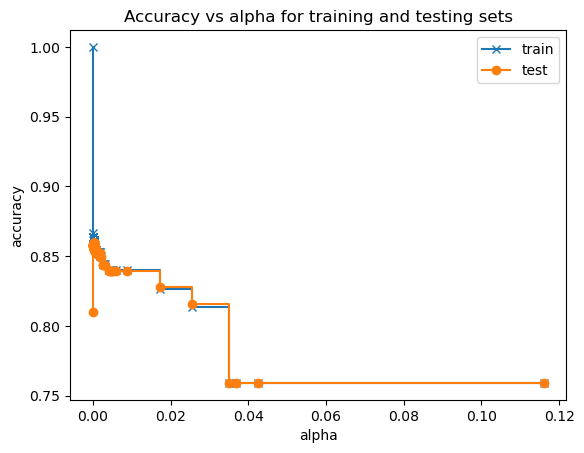

In [26]:
train_scores = [clf.score(X_train, Y_train) for clf in clfs]
test_scores = [clf.score(X_test, Y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='x', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [29]:
max_score_test = max(test_scores)
inx = test_scores.index(max_score_test)
ccp_alphas[inx]

0.00022495982345852917

In [31]:
clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=0.00022495982345852917)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.00022495982345852917, random_state=0)

In [32]:
clf.score(X_test, Y_test)

0.859231052696229

### Restrinction method for Pre-Pruning

Now, we can run a loop, restricting the depth to collect no of nodes and accuracy for both test and valid data, finallly create a data for graphing the discrepancy caused by overfitting, as well as later pruning our resultant model.

In [73]:
trainscore = []
testscore = []
nofnodes = []
depthcou = []
for i in range(1, 55):
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=i)
    clf.fit(X_train, Y_train)
    trainscore.append(clf.score(X_train, Y_train))
    testscore.append(clf.score(X_valid, Y_valid))
    nofnodes.append(clf.tree_.node_count)
    depthcou.append(i)

Text(0.5, 1.0, 'Varying depth of tree')

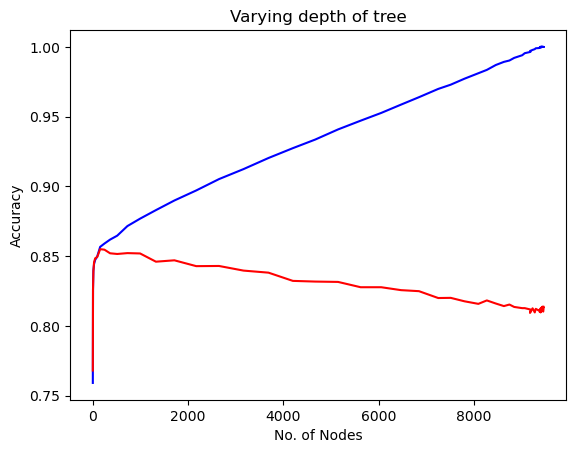

In [74]:
plt.plot(nofnodes,trainscore,'b')
plt.plot(nofnodes,testscore, 'r')
plt.xlabel("No. of Nodes")
plt.ylabel("Accuracy")
plt.title("Varying depth of tree")

In [75]:
maxacc = max(testscore)
inx = testscore.index(maxacc)
maxnodes = nofnodes[inx]
maxnodes, depthcou[inx]

(157, 7)

Doing the same, but this time restricting no of nodes

In [19]:
trainscore1 = []
testscore1 = []
nofnodes1 = []
noofleaf = []
for i in range(2, 9503, 100):
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes=i)
    clf.fit(X_train, Y_train)
    trainscore1.append(clf.score(X_train, Y_train))
    testscore1.append(clf.score(X_valid, Y_valid))
    nofnodes1.append(clf.tree_.node_count)
    noofleaf.append(i)

Text(0.5, 1.0, 'Varying no. of Leaf nodes')

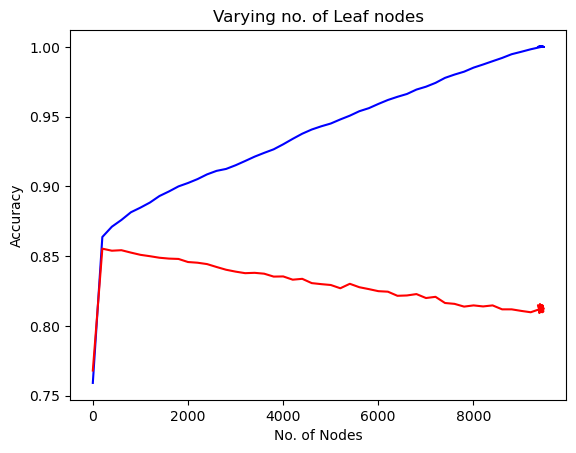

In [21]:
plt.plot(nofnodes1,trainscore1,'b')
plt.plot(nofnodes1,testscore1, 'r')
plt.xlabel("No. of Nodes")
plt.ylabel("Accuracy")
plt.title("Varying no. of Leaf nodes")

In [22]:
maxacc = max(testscore1)
inx = testscore1.index(maxacc)
maxnodes = nofnodes1[inx]
maxleaf = noofleaf[inx]
maxnodes,maxleaf

(203, 102)

Taking average of two maxnodes value gives max nodes of 225 

In [14]:
cartree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8)
cartree.fit(X_train, Y_train)
cartree.score(X_valid, Y_valid)

0.8547911547911548

In [113]:
cartree.score(X_test, Y_test)

0.8577570323056135

In [15]:
with open("DecisionTreeFinal.pkl",'wb') as f:
    pickle.dump(cartree,f)

We've got an accuracy of 85.8% for test data, which closely matches that of validation data

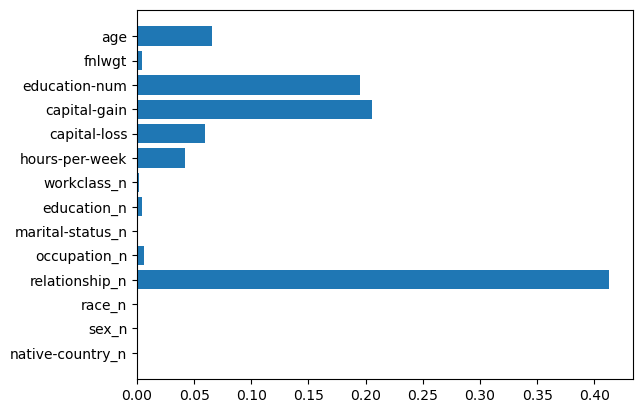

In [22]:
fi = cartree.feature_importances_
fig, ax = plt.subplots()
ax.barh(X_train.columns,fi)
ax.invert_yaxis()

In [23]:
fig.savefig('FeatureDF.png')

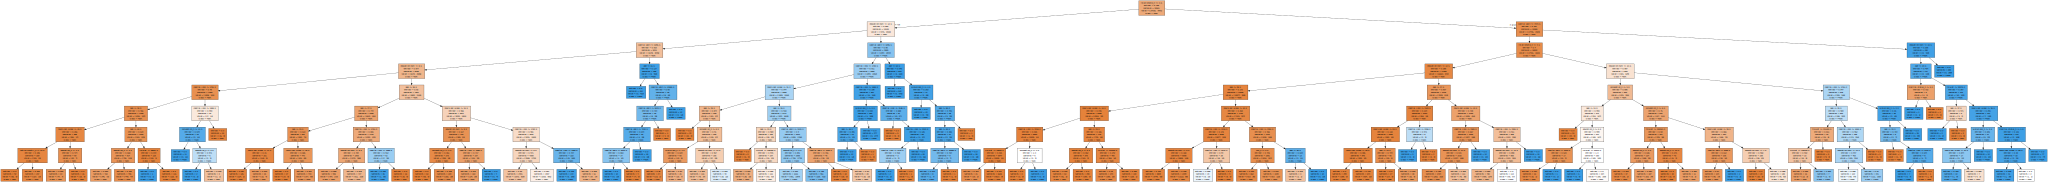

In [21]:
with open("DecisionTreeFinal.pkl",'rb') as f:
    cartree = pickle.load(f)
dot_data = tree.export_graphviz(cartree, out_file=None, feature_names=X_train.columns, class_names=['<50K','>=50K'], filled=True)

# Create a graph from the Graphviz data
graph = graphviz.Source(dot_data)

# Render the graph
graph.render("decision_tree")

# Display the graph
graph

In [17]:
graph.format = 'png'
graph.render('DecisionFinal')

'DecisionFinal.png.png'

## Choosing random data and training

### Preprocessing data

In [28]:
data = pd.read_csv("data1/combined.csv", na_values="?")
mode_values = data.median(numeric_only=True)
data.fillna(mode_values, inplace=True)
mode_values = []
for column in train_df.columns:
    if train_df[column].dtype == 'object':
        mode_value = train_df[column].mode()[0]
        mode_values.append(mode_value)
        train_df[column].fillna(mode_value, inplace=True)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [29]:
data = encode_data_with_mapping(data)
X = data.drop(columns='class_n', axis='columns')
Y = data.class_n
data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_n,education_n,marital-status_n,occupation_n,relationship_n,race_n,sex_n,native-country_n,class_n
0,39,77516,13,2174,0,40,6.0,9,4,0.0,1,4,1,38.0,0
1,50,83311,13,0,0,13,5.0,9,2,3.0,0,4,1,38.0,0
2,38,215646,9,0,0,40,3.0,11,0,5.0,1,4,1,38.0,0
3,53,234721,7,0,0,40,3.0,1,2,5.0,0,2,1,38.0,0
4,28,338409,13,0,0,40,3.0,9,2,9.0,5,2,0,4.0,0


In [30]:
X_train,X_test,Y_train, Y_test = train_test_split(X,Y,test_size=0.33,random_state=10)
X_train.shape,X_test.shape

((32724, 14), (16118, 14))

In [31]:
X_valid, X_test, Y_valid, Y_test = train_test_split(X_test, Y_test, test_size=0.5, random_state=10)
X_valid.shape, X_test.shape

((8059, 14), (8059, 14))

### Training and scoring

In [42]:
cartree = tree.DecisionTreeClassifier(criterion='entropy')
cartree.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [43]:
cartree.tree_.node_count

9365

In [44]:
cartree.get_depth()

48

In [45]:
trainscore = []
testscore = []
nofnodes = []
depthcon = []
for i in range(1, 55):
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth=i)
    clf.fit(X_train, Y_train)
    trainscore.append(clf.score(X_train, Y_train))
    testscore.append(clf.score(X_valid, Y_valid))
    nofnodes.append(clf.tree_.node_count)
    depthcon.append(i)

Text(0.5, 1.0, 'Varying depth of tree')

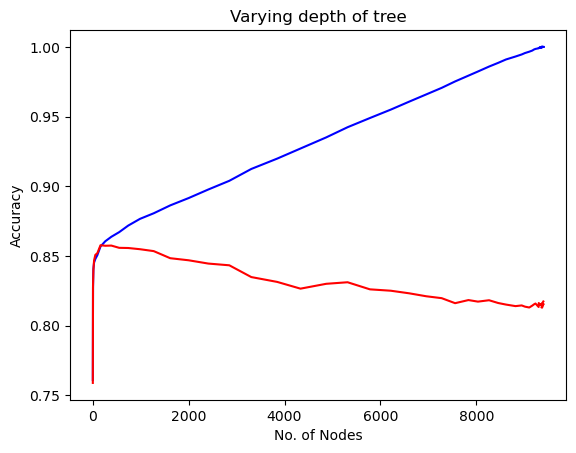

In [46]:
plt.plot(nofnodes,trainscore,'b')
plt.plot(nofnodes,testscore, 'r')
plt.xlabel("No. of Nodes")
plt.ylabel("Accuracy")
plt.title("Varying depth of tree")

In [47]:
maxacc = max(testscore)
inx = testscore.index(maxacc)
maxnodes = nofnodes[inx]
maxnodes,depthcon[inx]

(163, 7)

In [106]:
cartree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=8)
cartree.fit(X_train, Y_train)
cartree.score(X_valid, Y_valid)

0.8554054054054054

In [107]:
cartree.score(X_test, Y_test)

0.8577570323056135

In [108]:
with open("DecisionTreeRandom.pkl",'wb') as f:
    pickle.dump(cartree,f)

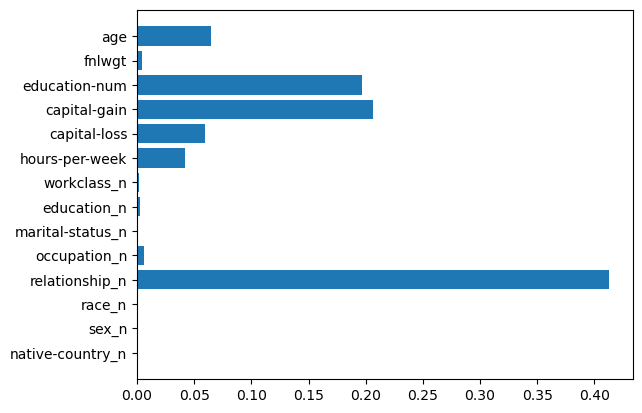

In [19]:
fi1 = cartree.feature_importances_
fig, ax = plt.subplots()
ax.barh(X_train.columns,fi1)
ax.invert_yaxis()

In [20]:
fig.savefig('FeatureDR.png')

D:\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


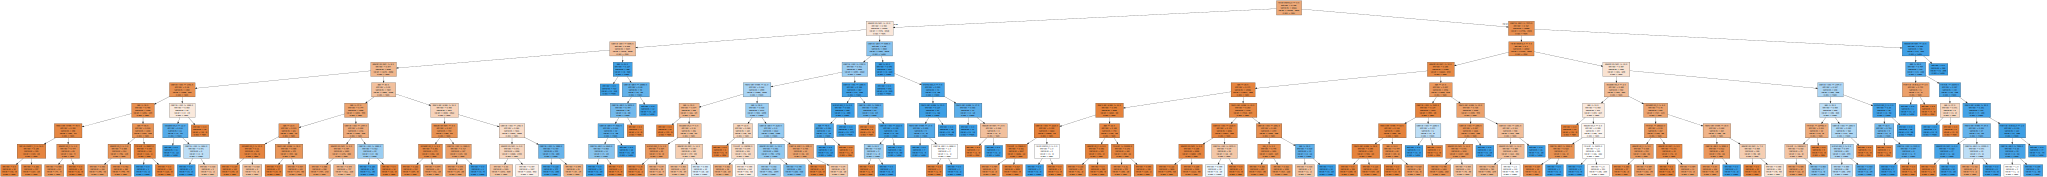

In [18]:
with open("DecisionTreeRandom.pkl",'rb') as f:
    cartree = pickle.load(f)
dot_data = tree.export_graphviz(cartree, out_file=None, feature_names=X_train.columns, class_names=['<50K','>=50K'], filled=True)

# Create a graph from the Graphviz data
graph = graphviz.Source(dot_data)

# Render the graph
graph.render("decision_tree")

# Display the graph
graph

In [19]:
graph.format = 'png'
graph.render('DecisionRandom')

'DecisionRandom.png.png'

## Comparing the two results

Text(0.5, 1.0, 'Randomized data')

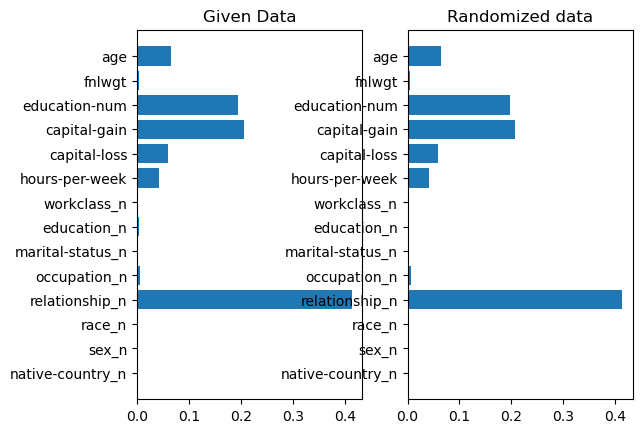

In [24]:
fig, ax = plt.subplots(1,2)
ax[0].barh(X_train.columns,fi)
ax[0].invert_yaxis()
ax[0].set_title("Given Data")
ax[1].barh(X_train.columns,fi1)
ax[1].invert_yaxis()
ax[1].set_title("Randomized data")

In [25]:
fig.savefig('FeatureDCompare.png')

We can clearly observe that the feature importance for both models is quite similar

## Random Forest

In [32]:
X_train.shape,X_test.shape, X_valid.shape

((32724, 14), (8059, 14), (8059, 14))

In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion='entropy', n_estimators=10)
rfc.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [34]:
rfc.score(X_train,Y_train)

0.9877765554333211

In [35]:
rfc.score(X_valid, Y_valid)

0.8491127931505149

In [36]:
rfc = RandomForestClassifier(criterion='entropy', n_estimators=30)
rfc.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30)

In [37]:
rfc.score(X_train,Y_train), rfc.score(X_valid, Y_valid)

(0.9981359247035815, 0.8546966124829384)

In [38]:
with open("RandomForestModel.pkl",'wb') as f:
    pickle.dump(rfc,f)

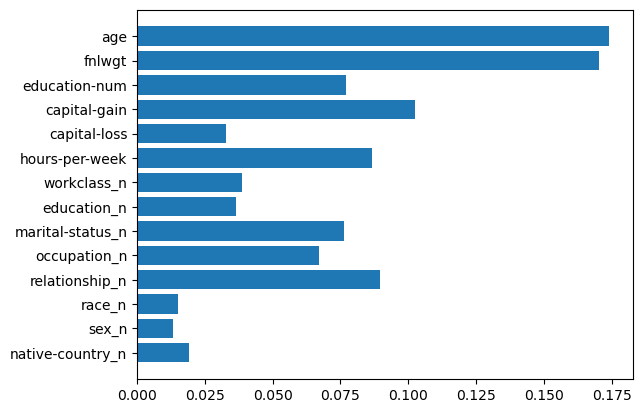

In [39]:
fi2 = rfc.feature_importances_
fig, ax = plt.subplots()
ax.barh(X_train.columns,fi2)
ax.invert_yaxis()

In [40]:
fig.savefig('FeatureRF.png')

Text(0.5, 1.0, 'Random Forest')

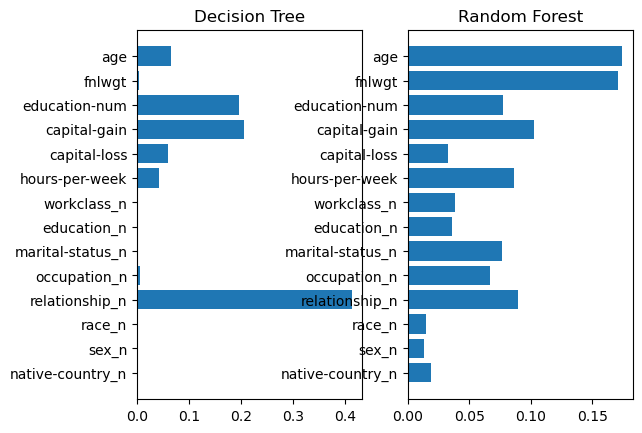

In [41]:
fig, ax = plt.subplots(1,2)
ax[0].barh(X_train.columns,fi1)
ax[0].invert_yaxis()
ax[0].set_title("Decision Tree")
ax[1].barh(X_train.columns,fi2)
ax[1].invert_yaxis()
ax[1].set_title("Random Forest")

In [42]:
fig.savefig('RandomDecisonCompare.png')

It is quite evident that the random forest see more value in all the attributes, and is more meaningful as well from a data scientists' POV. Age can be easily understood as the factor affecting the data, while relationship being the main attribute makes little sense.
Thus, with increase in attributes, decision tree becomes worser, heavier and slower.

In [ ]:
with open("RandomForestModel.pkl",'rb') as f:
    random_forest = pickle.load(f)

for i in range(0,5):
    decision_tree = random_forest.estimators_[i]
    dot_data = tree.export_graphviz(decision_tree, out_file=None, feature_names=X_train.columns, class_names=['<50K','>=50K'], filled=True)
    graph = graphviz.Source(dot_data)
    graph.format = 'png'
    graph.render('outpurandomforest/tree'+str(i))

## Report
With this, we can finally report our findings, and complete our report. For this assignment, we used chefboost to understand the basics of C4.5 algorithm, Owing to the lack of adaptability of the algorithm, we switched to sklearn's Decision Tree Classifier, which is a CART algorithm. We have used graphviz, a tool which allowed us to plot the trees, and are saved inside the folder as .png's. For One Hot Encoding, we have used LabelEncoder of sklearn, and for splitting data, we have used traintestsplit of sklearn. We have also used Random Tree Classifier of sklearn.ensmble, and json and pickle libraries to store relevant data and model. We studied the difference between provided data and random data, and found difference to be negligible, indicating that the data is sufficiently generalised.

Then, we found the random tree classifier with 30 trees, and had a better accuracy, as well as understanding of different attributes. We plotted the Feature importance graphs of all our models, thus understanding for these models.

The Decision Tree with given data is referred to as Decision Final, random data tree as Decision Random, and Random Forest as Random Forest. We have saved the model to start working any time we require to. 

### Rules derived
For class <50k:
(relationship<=0.5)^(education <=12.5) ^ (capital gain <=5095.5) ^ (education <=8.5) ^ (capital loss < = 1791.5) ^ (age <=36.5) ^ (hour per week<=49) ^ (native country <= 34.5)
And so on

For class >=50k:
(Capital gain >7669.5) ^ (marital status <=1) ^ (hour per week > 35.5) ^ (flwgt > 33379) ^ (age >20) ^ (education <=10.5) ^ (capital gain > 7073.5) ^ (relationship > 0.5)
And so on
